In [2]:
import warnings
warnings.filterwarnings("ignore")

# Import basic required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

## Structured Data

In [4]:
#Importing Data from .CSV Files - user_rating
adult_data = pd.read_csv("C:/Users/DELL/Desktop/data.csv")
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  probability     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
adult_data.shape

(32561, 15)

# HANDLING MISING VALUES

In [29]:
#Replace '?' with NaN
adult_data.replace(' ?', np.NaN, inplace = True)

In [30]:
#Where are the NaN values?
adult_data.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
#Which columns contain NaN values?
adult_data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
probability       False
dtype: bool

In [32]:
#Drop columns with more than 40% missing values
adult_data.dropna(axis = 1, inplace = True, thresh = 60 * 1.1)

In [33]:
#Check how many columns are dropped
adult_data.shape

(32561, 15)

In [34]:
# drop rows with missing values
adult_data.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(adult_data.shape)

(30162, 15)


In [35]:
# drop rows with duplicate values
adult_data.drop_duplicates(keep=False,inplace=True)
print(adult_data.shape)

(30117, 15)


# OUTLIERS

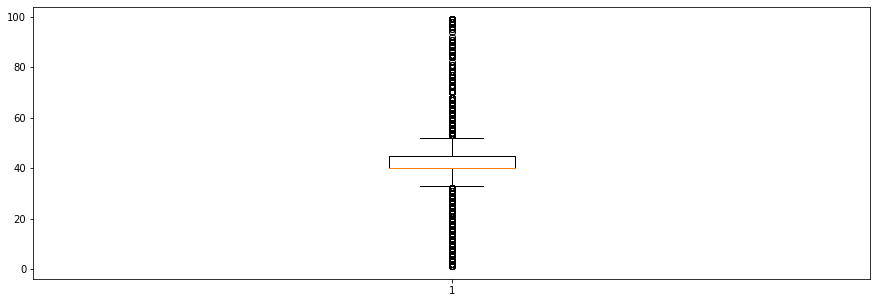

In [36]:
plt.figure(figsize=(15,5))
plt.boxplot(adult_data['hours-per-week']);

In [37]:
upper_limit = adult_data['hours-per-week'].mean() + 3 * adult_data['hours-per-week'].std()
lower_limit = adult_data['hours-per-week'].mean() - 3 * adult_data['hours-per-week'].std()
upper_limit, lower_limit

(76.87010543724102, 5.006177061015769)

In [38]:
adult_data['hours-per-week'].max()

99

In [39]:
adult_data[(adult_data['hours-per-week'] > upper_limit) |(adult_data['hours-per-week'] < lower_limit) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
272,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32157,45,Self-emp-not-inc,49595,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,80,United-States,<=50K
32391,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,<=50K
32402,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,>50K
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K


In [40]:
IQR = adult_data['hours-per-week'].quantile(0.75) - adult_data['hours-per-week'].quantile(0.25)
IQR

5.0

In [41]:
upper_limit = adult_data['hours-per-week'].quantile(0.75) + 1.5 * IQR
lower_limit = adult_data['hours-per-week'].quantile(0.25) - 1.5 * IQR
upper_limit, lower_limit

(52.5, 32.5)

In [42]:
adult_data[(adult_data['hours-per-week'] > upper_limit) |(adult_data['hours-per-week'] < lower_limit) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [43]:
adult_data[(adult_data['hours-per-week'] < upper_limit) & (adult_data['hours-per-week'] > lower_limit) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [44]:
adult_data['hours-per-week'].describe()

count    30117.000000
mean        40.938141
std         11.977321
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [45]:
upper_limit = adult_data['hours-per-week'].quantile(0.95)
lower_limit = adult_data['hours-per-week'].quantile(0.05)
upper_limit, lower_limit

(60.0, 20.0)

In [46]:
adult_data[(adult_data['hours-per-week'] > upper_limit) |(adult_data['hours-per-week'] < lower_limit) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,35,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
32495,26,Private,179010,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
32520,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K
32524,26,Private,191648,Assoc-acdm,12,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,15,United-States,<=50K


In [47]:
adult_data['zscore'] = (adult_data['hours-per-week'] - adult_data['hours-per-week'].mean())/adult_data['hours-per-week'].std()
adult_data['zscore'] 

0       -0.078326
1       -2.332587
2       -0.078326
3       -0.078326
4       -0.078326
           ...   
32556   -0.245309
32557   -0.078326
32558   -0.078326
32559   -1.748149
32560   -0.078326
Name: zscore, Length: 30117, dtype: float64

In [48]:
adult_data[(adult_data['zscore'] > 3) | (adult_data['zscore'] < -3) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability,zscore
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,3.261318
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K,3.261318
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K,-3.250989
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,-3.334480
272,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K,4.764159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32157,45,Self-emp-not-inc,49595,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,80,United-States,<=50K,3.261318
32391,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,<=50K,3.344810
32402,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,>50K,4.012739
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K,-3.167498


In [49]:
round(adult_data['zscore'].describe(),2)

count    30117.00
mean        -0.00
std          1.00
min         -3.33
25%         -0.08
50%         -0.08
75%          0.34
max          4.85
Name: zscore, dtype: float64

# TRANSFORMING DATA

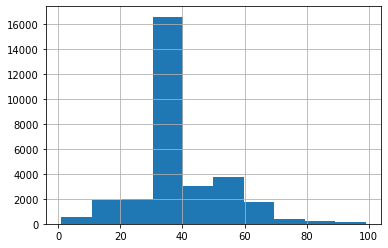

In [50]:
adult_data['hours-per-week'].hist();

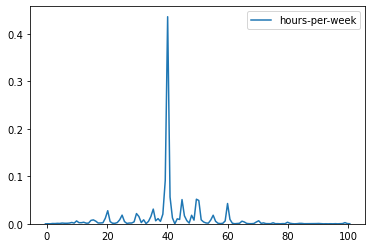

In [51]:
sns.kdeplot(adult_data['hours-per-week'])

In [52]:
adult_data['log_sold'] = np.log(adult_data['hours-per-week'])

In [53]:
adult_data['log_sold'].head()

0    3.688879
1    2.564949
2    3.688879
3    3.688879
4    3.688879
Name: log_sold, dtype: float64

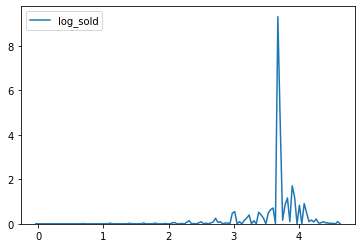

In [54]:
sns.kdeplot(adult_data['log_sold'])

In [55]:
import scipy.stats as st
def transformed_variable(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    st.probplot(df[variable],dist='norm',plot=plt)
    plt.show()

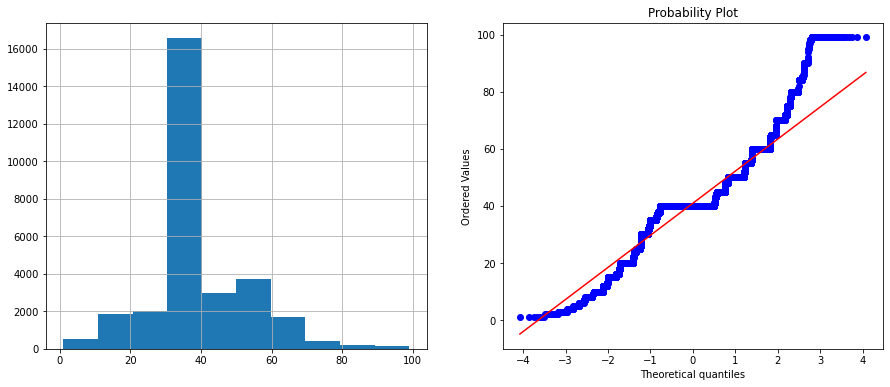

In [56]:
#original data
transformed_variable(adult_data,'hours-per-week')

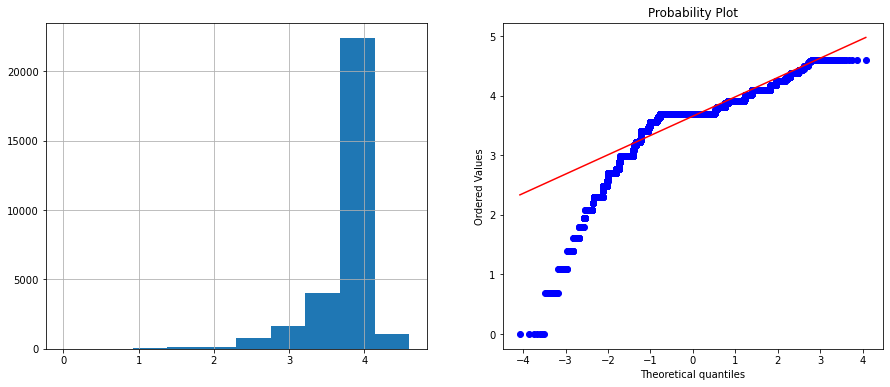

In [57]:
#log Transformed
transformed_variable(adult_data,'log_sold')

In [58]:
adult_data['sqrt_sold'] = np.sqrt(adult_data['hours-per-week'])

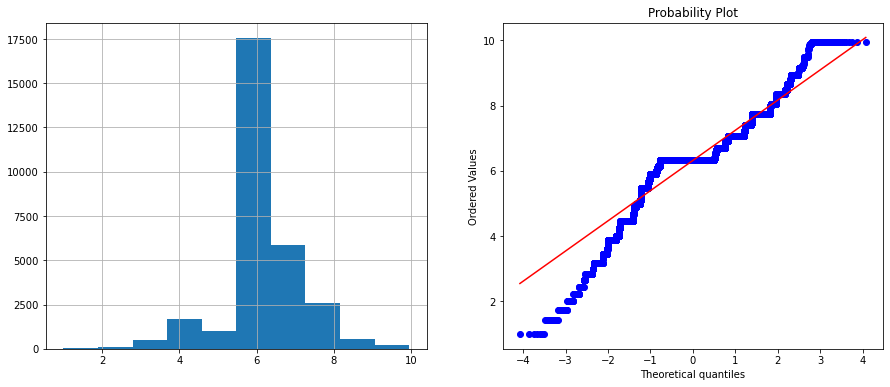

In [59]:
#squareroot transformed
transformed_variable(adult_data,'sqrt_sold')

In [60]:
adult_data['sqrt_sold'].describe()

count    30117.000000
mean         6.319849
std          0.998842
min          1.000000
25%          6.324555
50%          6.324555
75%          6.708204
max          9.949874
Name: sqrt_sold, dtype: float64

In [61]:
round(adult_data['sqrt_sold'].describe(),2)

count    30117.00
mean         6.32
std          1.00
min          1.00
25%          6.32
50%          6.32
75%          6.71
max          9.95
Name: sqrt_sold, dtype: float64

In [62]:
adult_data['square_sold'] = (adult_data['hours-per-week']**2)

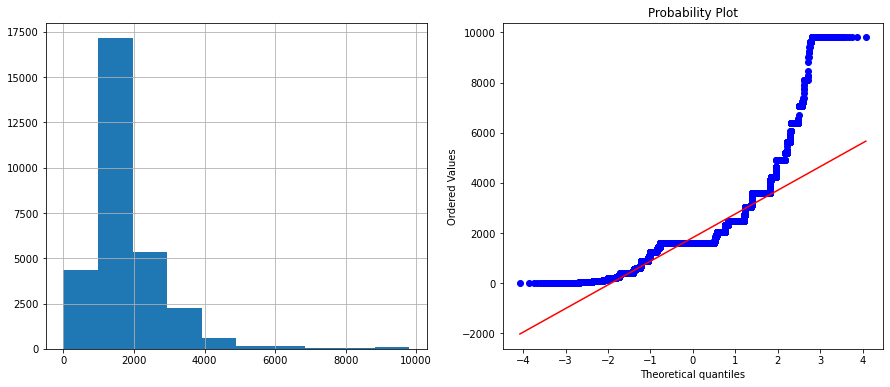

In [63]:
#square transformed
transformed_variable(adult_data,'square_sold')

In [64]:
adult_data['cube_root_sold'] = pow(adult_data['hours-per-week'],1/3)

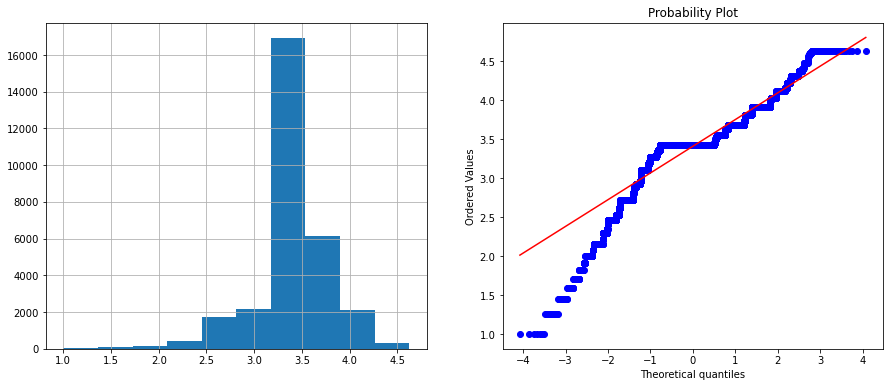

In [65]:
#cube transformed
transformed_variable(adult_data,'cube_root_sold')

# DATA VISUALIZATION of overall PROFIT Through various ASPECT

In [66]:
#univariate for categorical analysis
adult_data.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,probability
count,30117,30117,30117,30117,30117,30117,30117,30117,30117
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22243,9828,14053,4030,12451,25892,20352,27470,22613


## workclass vs overall profit

In [72]:
adult_data['workclass'].value_counts()

 Private             22243
 Self-emp-not-inc     2497
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

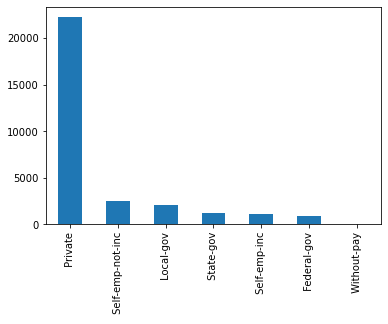

In [73]:
#barplot
adult_data['workclass'].value_counts().plot(kind='bar')

Text(0.5, 0, 'These are different race of people')

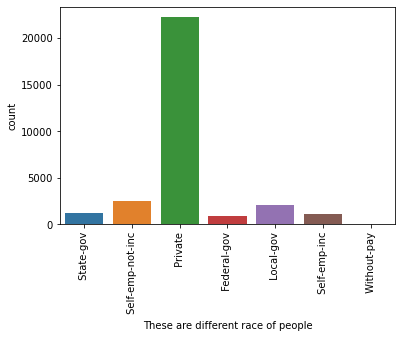

In [74]:
#colored bar plot
sns.countplot(adult_data['workclass'])

plt.xticks(rotation=90)
plt.xlabel('These are different race of people')

In [79]:
workclass_profit = adult_data.groupby('workclass',as_index=False).agg({'capital-gain':'sum','capital-loss':'sum'}).sort_values(by='workclass')

In [80]:
workclass_profit

,workclass,capital-gain,capital-loss
0,Federal-gov,784879,105363
1,Local-gov,1714019,228038
2,Private,19608520,1774623
3,Self-emp-inc,5166742,164864
4,Self-emp-not-inc,4780923,288815
5,State-gov,875228,103788
6,Without-pay,6830,0


In [81]:
workclass_profit["overall_profit"]= workclass_profit["capital-gain"]-workclass_profit["capital-loss"]
workclass_profit

,workclass,capital-gain,capital-loss,overall_profit
0,Federal-gov,784879,105363,679516
1,Local-gov,1714019,228038,1485981
2,Private,19608520,1774623,17833897
3,Self-emp-inc,5166742,164864,5001878
4,Self-emp-not-inc,4780923,288815,4492108
5,State-gov,875228,103788,771440
6,Without-pay,6830,0,6830


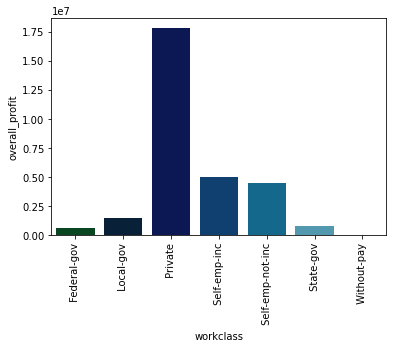

In [82]:
#hue bar plot
sns.barplot(x='workclass',y='overall_profit',data=workclass_profit,palette='ocean')

plt.xticks(rotation=90);

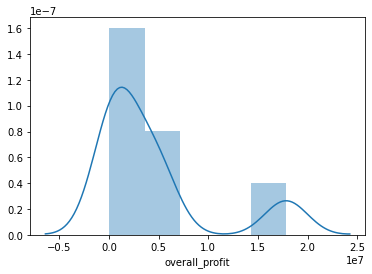

In [105]:
#kde plot
sns.distplot(workclass_profit["overall_profit"]);

In [85]:
workclass_profit["overall_profit"].describe()

count    7.000000e+00
mean     4.324521e+06
std      6.266317e+06
min      6.830000e+03
25%      7.254780e+05
50%      1.485981e+06
75%      4.746993e+06
max      1.783390e+07
Name: overall_profit, dtype: float64

## age vs overall profit

In [86]:
age_profit = adult_data.groupby('age',as_index=False).agg({'capital-gain':'sum','capital-loss':'sum'}).sort_values(by='age')

In [87]:
age_profit 

,age,capital-gain,capital-loss
0,17,8178,16492
1,18,54944,14773
2,19,48897,24344
3,20,26594,20108
4,21,138213,33673
...,...,...,...
67,84,0,0
68,85,0,0
69,86,0,0
70,88,0,0


In [88]:
age_profit["overall_profit"]= age_profit["capital-gain"]-age_profit["capital-loss"]
age_profit

,age,capital-gain,capital-loss,overall_profit
0,17,8178,16492,-8314
1,18,54944,14773,40171
2,19,48897,24344,24553
3,20,26594,20108,6486
4,21,138213,33673,104540
...,...,...,...,...
67,84,0,0,0
68,85,0,0,0
69,86,0,0,0
70,88,0,0,0


In [92]:
#correlation between age and profit
np.corrcoef(age_profit['age'],age_profit["overall_profit"])

array([[ 1.        , -0.32801148],
       [-0.32801148,  1.        ]])

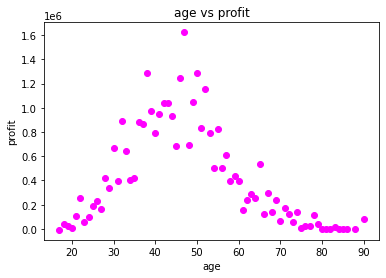

In [94]:
#scatter-plot
plt.scatter(age_profit['age'],age_profit["overall_profit"],color='magenta');

plt.xlabel('age')
plt.ylabel('profit')

plt.title('age vs profit');

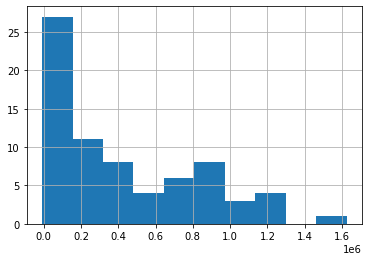

In [95]:
#histogram
age_profit["overall_profit"].hist()

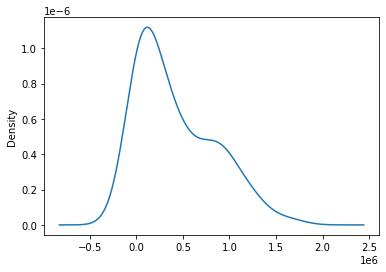

In [96]:
#density gaph
age_profit["overall_profit"].plot(kind='density')

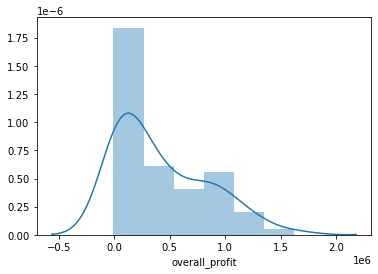

In [100]:
#kde plot
sns.distplot(age_profit["overall_profit"]);

## number of males and females in each workplace

In [107]:
adult_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [109]:
adult_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [119]:
grouped_data=adult_data[['workclass','sex']].groupby(by=['workclass','sex']).size().unstack().reset_index()

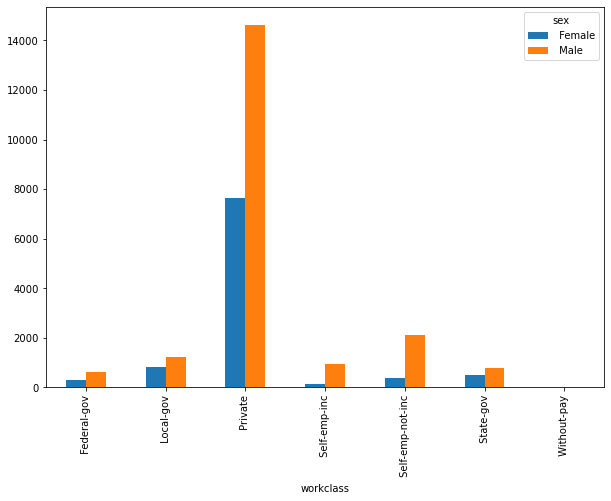

In [121]:
#stacked bar graph
grouped_data.plot(x="workclass", kind='bar', stacked=False, figsize=(10,7))